## Regular expression operations

A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Python has a built-in package called re, which can be used to work with Regular Expres-sions.

You can find details here: https://docs.python.org/3/library/re.html#regular-expression-syntax


In [1]:
import re 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\theoj\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


#### 1. Write a regex to extract the score, Cristiano’s age, number of goals and the number of selections from the following text:

In [2]:
txt = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."
score=re.search(',',txt)
scoreS = score.start()-4
scoreE = score.end()-1
print('Première version :')
print(txt[scoreS:scoreE-1])

age=re.search('ans',txt)
ageS = age.start()-3
ageE = age.end()
print(txt[ageS:ageE])

but = re.search('buts',txt)
butS = but.start()-4
butE = but.end()
print(txt[butS:butE])

match = re.search('match',txt)
matchS = match.start()-4
matchE = match.end()
print(txt[matchS:matchE])


#OTHER BETTER SOLUTION
print('Version optimisée :')
a=re.findall('\(\d+.*?\)|\d+ matchs',txt)
print(a)



Première version :
3-0
36 ans
112 buts
181 match
Version optimisée :
['(3-0)', '(36 ans)', '(112 buts)', '181 matchs']


#### 2. Write a regex to get prices from the following text:

In [3]:
txt = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction ? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."
print(re.findall('\d+ euros',txt))

['230 euros', '900 euros']


#### 3. Write a regexp to get reduction values, along with promo code:

In [4]:
txt = """
- 40% sur tous les réservoirs d'essence et collecteurs d'échappement ( achats internet uniquement ) avec le code promo: PRINTEMPS40

- 40% sur tous les carénages plastique  ( achats internet uniquement ) avec le code promo: CARENAGE40

- 50% sur toutes les rampes d'injection ( achats internet uniquement ) avec le code promo: INJECTION50
"""
re.findall('\d+% | [A-Z].*\d',txt)

['40% ', ' PRINTEMPS40', '40% ', ' CARENAGE40', '50% ', ' INJECTION50']

# Web scrapping

# Parsing the HTML with BeautifulSoup

BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.

### Téléthon use case (read, store, visualize)
https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon

In [5]:
url        = "https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon"
requesting = requests.get(url)
soup       = BeautifulSoup(requesting.content, "html.parser")

In [6]:

with open('tst.html', 'w') as f:
    f.write(str(soup))

def read():
    with open('tst.html','r') as f:
        a = f.readlines()
        for i in a:
            print(i)
#read()

## Let's look for some information in the page

#### 1. In 2006, the counter reached its highest level. Extract this information from the webpage (a sentence in the page).

In [7]:
# Using text
tel_nrs = re.findall('2006 .* €', requesting.text)

print(tel_nrs)

['2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €']


In [8]:
# Using tag
s = soup.find_all("p")

for a in soup.find_all("p"):
    a = a.text
    if '2006' in a:
        print(a)

C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €. 


In [9]:
# Using cssselector 
soup.select('#les-montants-collectes-pour-le-telethon-depuis-1987-5959 > div > p:nth-child(5)')

[<p>C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €. </p>]

#### 2. Retrieve the publication date from the webpage, using the CSS classes.

In [10]:
soup.find_all('div', class_='date')[0]

<div class="date">
              Publié le 09/06/2022 
            </div>

#### 3. Find the number of tables defined in the soup. 

In [11]:
len(soup.findAll('table'))

1

#### 3. Retrieve the items from this table. Create a python dataframe representing this table (do not forget to include the name of the columns as defined in the webpage).

In [12]:
table = soup.find(lambda tag: tag.name=='table') 

df = pd.read_html(str(table))[0]
df.head()


,Année,Montant collecté
0,1987,29 650 000 €
1,1988,28 490 000 €
2,1989,40 930 000 €
3,1990,46 510 000 €
4,1991,38 650 000 €


#### 4. Clean up columns and their types 
(it's up to you to propose how, why and what to do)

In [13]:
df['Montant collecté']=df['Montant collecté'].str.replace(" |€","",regex=True).astype(int)
df.head()

,Année,Montant collecté
0,1987,29650000
1,1988,28490000
2,1989,40930000
3,1990,46510000
4,1991,38650000


#### 5. Retrieve the date when the most amount was collected 

(we already scrapped the info before, here we want the info with the table)

In [14]:
df.sort_values(by='Montant collecté',ascending=False).head(1)

,Année,Montant collecté
19,2006,106696532


#### 6. Visualize the evolution of the amount collected per year.
#### Mark the maximum and minimum of the evolution with respectively red and green colors.

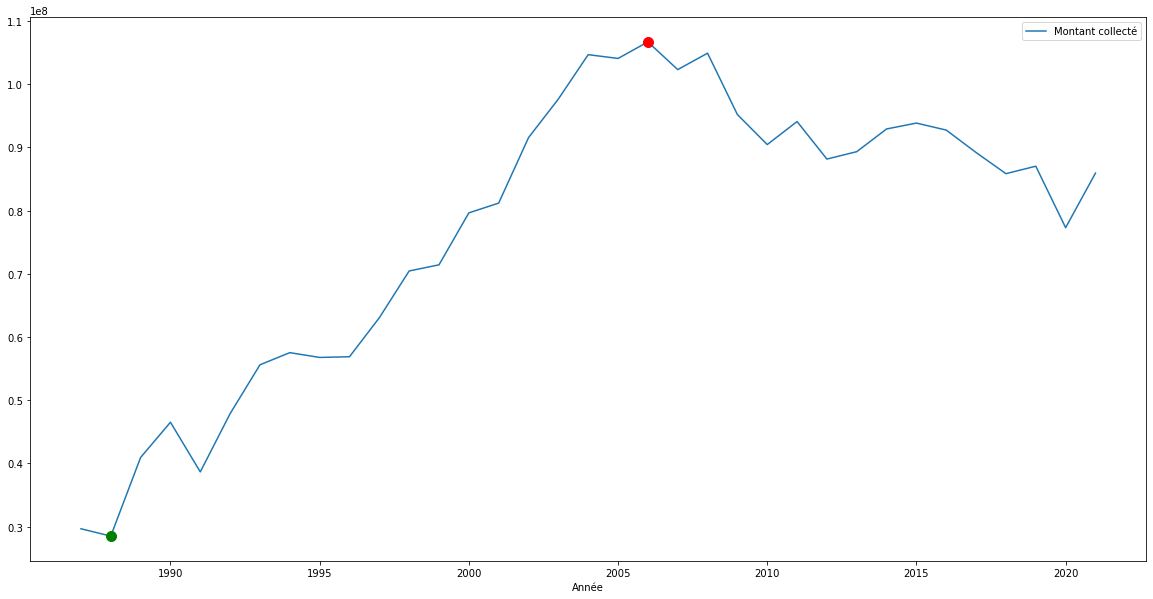

In [15]:
import plotly.express as px

df.plot('Année','Montant collecté',figsize=(20,10))
xmax = df['Montant collecté'].argmax()
xmin = df['Montant collecté'].argmin()
plt.plot(df.iloc[xmax,0],df.iloc[xmax,1],'o',color='red',markersize=10)
plt.plot(df.iloc[xmin,0],df.iloc[xmin,1],'o',color='green',markersize=10)


## Use case 2: https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html

In [16]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = requests.get(url )
html  = page.text
soup  = BeautifulSoup(html)

#### Convert the table of this site into a pandas dataframe

You must include the names of the columns and the names of the rows (the hours) as an index 

In [17]:
def minmax(x):
    return str(x.split('C ')[1])
def temp(x):
    return str(x.split(' ')[0]+x.split(' ')[1])
def raf(x):
    return float(x.split('raf.')[1])
def vent(x):
    return str(x.split('r')[0])

In [18]:
table = soup.find_all(lambda tag: tag.name=='table')

df = pd.read_html(str(table))[1] #On choisit le bon tableau de valeurs
df = df.set_index('Heure locale') #Change index pour des heures
df = df.drop(columns=['Unnamed: 1']) #Drop colonne inutile
df.loc[df.index[16], 'Bio-météo'] = (df.loc[df.index[15], 'Bio-météo']+df.loc[df.index[17], 'Bio-météo'])/2 #Remplace NaN valeur par moyenne
df.insert(1,'MinMax',df['Température'].map(minmax)) #Séparation colonne Température et MinMax
df['Température'] = df['Température'].map(temp)
df.insert(4,'Rafales',df['Vent'].map(raf)) #Séparation colonne Vent et Rafale
df['Vent'] = df['Vent'].map(vent)

df

,Température,MinMax,Pluie,Vent,Rafales,Humidité,Bio-météo,Pt. de rosée,Pression,Visibilité
Heure locale,,,,,,,,,,
01h,13.9°C,13.9 → 14.3,0 mm/1h,14 km/h,32.4,76%,NaN,9.7 °C,1023hPa,20 km
00h,14.3°C,14.3 → 14.9,0 mm/1h,18 km/h,37.8,73%,NaN,9.5 °C,1023.2hPa,20 km
23h,14.9°C,14.7 → 14.9,0 mm/1h,14 km/h,39.6,69%,NaN,9.3 °C,1023.0hPa,20 km
22h,14.8°C,14.8 → 15.4,0 mm/1h,18 km/h,34.2,67%,NaN,8.7 °C,1022.8hPa,20 km
21h,15.4°C,15.4 → 16.8,0 mm/1h,14 km/h,45.7,62%,NaN,8.2 °C,1022.2hPa,20 km
20h,16.8°C,16.8 → 17.8,0 mm/1h,22 km/h,42.8,59%,81.0,8.7 °C,1021.6hPa,20 km
19h,17.7°C,17.6 → 18.2,0 mm/1h,18 km/h,37.8,51%,144.0,7.4 °C,1021.1hPa,20 km
18h,17.8°C,17.7 → 18.3,0 mm/1h,18 km/h,35.6,51%,192.0,7.5 °C,1021.0hPa,20 km
17h,18.3°C,18.1 → 18.7,0 mm/1h,14 km/h,34.6,49%,311.0,7.4 °C,1020.8hPa,20 km


### To help you: Define a function that allows you to retrieve the value of row i and column j of the table

In [19]:
def getVal(df,x,y):
    val = df.loc[df.index[x], df.columns[y]]
    return val

In [20]:
x = 0
y = 0
val = getVal(df,x,y)
print(f"La valeur à {df.index[x]}, ligne {x}, et à la colonne {df.columns[y]}, colonne {x}, est : {val}")

La valeur à 01h, ligne 0, et à la colonne Température, colonne 0, est : 13.9°C
